# **Les aventuriers des Axes Perdus**

#Epoch 1

***Olivier Thöni*** *(novice en IA, et sinon... professeur de mathématiques)*

*School of AI - Le Mans*

![Les Aventuriers de l'aXe perdu...£](https://drive.google.com/uc?id=1Q4g3DpbT1X49U9m2nr8hPy9vfQXIFCU8)



Lien vers le présent NoteBook : https://frama.link/OT_dimensions  
Lien de téléchargement du DataSet : https://frama.link/OT_dimension1_DataSet


## **Intro**

En Machine Learning, le prétraitement des data est un travail incontournable : sans nettoyage, préparation, manipulation préalables des données, point de Machine Learning !



![Le difficile parcours des données](https://drive.google.com/uc?id=117kYdf8gKMWnK401q_WLTsf9PkqFH0EJ)

Une des difficultés réside dans le volume de ces données, souvent énorme.

Par "volume", on entend deux choses : le nombre de dimensions, et la taille.

**--> Ne pas confondre "taille" et "dimension"**

![Dimension vs Taille](https://drive.google.com/uc?id=1eB5GYH-qcqvpzmHkSml7aAJY7P4hd9s1)


En *Data Science*, chaque variable (chaque "champ") de la population étudiée constitue une dimension. Par exemple, s'il s'agit d'étudier les performances de décathloniens, le résultat à chacune des 10 épreuves constituera une dimension.

Mais visualiser des données en 10 dimensions nous est impossible. C'est pourquoi on commence par réduire le nombre de dimensions.

C'est la raison d'être, par exemple, de :
* la regression linéaire, polynomiale ou logistique, 
* l'Analyse en Composantes Principales ("ACP" in french in ze text, ou "PCA in english), et sa version simplifiée utilisée dans la compression d'image : la SVD (Singular Value Decomposition)
* la clusterisation (segmentation) via l'algorithme *K-means*, 
* Le réseau de convolution (CNN) pour la classification d'images (en passant, dans un réseau de neurones convolutionnel, chaque "tuilage" revient à faire diminuer la **taille** des matrices en présence)
* etc.



Mais qui dit diminuer le nombre de dimensions dit forcément perdre de l'information !
Y aurait-il un moyen de récupérer l'information perdue ?

*Taddammmm...*

Ben oui, ça s'appelle **"Auto-Encoder"**

En remontant aux causes, sur les couches précédentes, qui ont pu activer tel ou tel neurone d'une couche donnée (en maths, ça s'appelle "Naive Bayes") : en analysant les corrélations entre une couche et la couche précédente, on arrive à reconstituer de l'information... via un réseau de neurone, of course...

Voyons tout ça !
... et sans trop de maths, si possible...


![…](https://drive.google.com/uc?id=1Vucwh4V_HPPCsYNagVqqZNeylZhvev1L)


---




# **1. Diminuer la dimensionnalité**

## **1.1. la régression linéaire**
Pour démarrer simplement : on passe de deux à une dimension...
C'est simpliste, mais c'est en comprenant ce qui se passe avec des données de petite dimensionnalité et de petite taille que l'on pourra faire confiance aux boîtes noires que sont les modules utiles en ML.

**Par exemple**, pour une agence immobilière, il peut être intéressant de disposer d'un outil permettant, connaissant la surface d'un appartement, de prédire le prix du marché, en fonction de la base de données déjà existante.

En Data Science, il faut toujours commencer par visualiser les données, quand c'est possible.
Ici, à partir des données existantes, on dresse le **"nuage de points** : en abscisses, la surface en m², en ordonnées, le prix en €.
Comme ce nuage est plutôt rectiligne, il est sensé de faire une **"regression *linéaire* du prix en fonction de la surface"**, c'est-à-dire que l'on va chercher à approcher le nuage par une droite, qui le représentera "au mieux". 

!["au mieux"…](https://poissonisfish.files.wordpress.com/2017/01/q7hip.gif?w=1108)

Cette idée de "au mieux" étant très subjective, précisons : on va chercher à rendre la plus petite possible la somme totale des distances verticales entre chaque point du nuage et le point de la droite ayant la même abscisse.(c'est-à-dire, dans notre exemple, pour une surface donnée, entre le prix réel et le prix du marché)...



![Régression linéaire de y en x](https://drive.google.com/uc?id=1nf5PUc_0vTparoXruDoxNz8xL6SVVBk7)


Bon, certes, il existe une formule toute simple qui permet de calculer l'équation de cette droite : y = a.x + b

![droite de régression](https://drive.google.com/uc?id=1-r5i_0lK36WLOJjeyF5vh2o7Sd8qCf8K)

(Les grandeurs en présence : **moyenne**, **variance** (capacité qu'a une variable à s'écarter de sa moyenne), **covariance** (effet qu'a la variation d'une variable sur l'autre) sont essentielles à la compréhension derrière le ML, ce sont sur elles que s'appuient les métriques utilisées pour mesurer les écarts entre le réel, le théorique, et le prédit)

Pour info, le calcul avec cette formule exacte donne approximativement a=25.6 et b=-68.6, si bien que pour un appartement de 250m², le loyer serait d'environ 6383€.


* *voir ici pour le développement mathématique complet : https://frama.link/OT_RegressionLineaire*

* *voir notamment la fin, révélatrice d'une erreur fréquente en régression linéaire : si on cherche à inférer sur la surface connaissant le prix, il ne faut pas calculer l'erreur "verticale" mais l'erreur "horizontale", qu'on fasse turbiner les maths ou le Machine Learning...*


... Mais se contenter d'une bête formule mathématique ne serait pas rigolo, on peut entraîner un modèle *from scratch* pour approcher, par une petite descente de grandient, l'équation de cette droite...

### **Code Python**
sources : 
* *Linear Regression with one or more variables* - Luca Zammataro

Traduit de l'anglais par [DeepL](https://www.deepl.com/fr/translator)


**1. import des bibliothèques à utiliser, import des données brutes, premiers traitement et visualisation**

Tout d'abord, nous importons tous les paquets nécessaires pour le code Python  : **NumPy**, **Pandas**, et **matplotlib**. Ces paquets appartiennent à **SciPy.org**, qui est un écosystème de logiciels libres pour les mathématiques, les sciences et l'ingénierie basé sur Python.
Numpy est nécessaire pour les calculs d'Algèbre Linéaire.
Pandas est une bibliothèque open-source qui fournit des structures de données et des outils d'analyse de données de haute performance pour Python. Une DataFrame de Pandas est une structure de données tabulaires bidimensionnelle à taille variable et potentiellement hétérogène. Elle se compose de trois composants principaux, les données, les lignes et les colonnes, avec des axes étiquetés (lignes et colonnes). 
Matplotlib est fondamental pour la création de tous les tracés.



In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

from __future__ import division


**import des données** :

Le code suivant utilise également le package **PyDrive** permettant d'accéder dans **Colaboratory**, à un fichier présent dans le Drive de l'utilisateur : ici, le fichier "APPART.csv", qui contient les données.
La première utilisation de la cellule demandera une procédure d'authentification : un lien à cliquer, qui envoie vers un code que l'on copie et colle dans la box prévue.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1uhgOwfDnduwHrJPt8qo0fAuutufQqvjd' # The shareable link of the data  csv file
fluff, id = link.split('=')# récupérer l'id seulement (ce qu'il y a derrière le sigen "=")

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('APPART.csv')  
df = pd.read_csv('APPART.csv', sep =";") # Fabrication du DataFrame Pandas, le séaparateur du fichier csv étant ";"
# Dataset is now stored in a Pandas Dataframe


df

,num_appart,Surface,Loyer,Localisation
0,a01,28,650,censier 1
1,a02,50,1400,contrescarpe
2,a03,106,3250,saint simon
3,a04,196,4000,rapp
4,a05,55,1340,saint andre des art
5,a06,190,3950,pres quais du 5eme
6,a07,110,2500,gobelins 1
7,a08,60,1600,gobelins 2
8,a09,48,1250,censier
9,a10,35,1250,pantheon 1


In [0]:
m = len(df) # taille des données
m

28

**extraction des deux colonnes utiles**

In [0]:
# Fabrique le numpy array X, contenant les valeurs de Surface.
# et le vecteur de sortie y, contenant les valeurs de Loyer.
X = np.array(df.Surface.values)
y = np.array(df.Loyer.values)



In [0]:
X

array([ 28,  50, 106, 196,  55, 190, 110,  60,  48,  35,  86,  65,  32,
        52,  40, 260,  70, 117,  90,  30, 105,  52,  80,  60, 140,  20,
       100,  28])

In [0]:
y

array([ 650, 1400, 3250, 4000, 1340, 3950, 2500, 1600, 1250, 1250, 1750,
       1500,  775, 1225, 1000, 7500, 1625, 4750, 1890,  390, 1875, 1000,
       1350, 1475, 4950,  425, 2475,  425])

**visualisation du nuage de points**

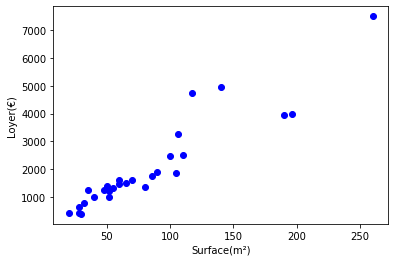

In [0]:
# Plot the data (plt is a matplotlib object)
plt.scatter(X, y,  color='blue')
# Put labels
plt.xlabel("Surface(m²)")
plt.ylabel("Loyer(€)")

plt.show()


Le modèle



In [0]:
def predict(w, b, X):
    """ A method that runs our linear model
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float (1, 1)
        The bias unit for our linear model
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    """
    return w * X + b
 


Le coût

**Calcul du coût pour une droite donnée**

Le coût, également appelé **"risque quadratique"** : c'est la moyenne des carrés des **"résidus"**, distances verticales entre chaque point du nuage et la droite supposée approcher le nuage, qui est la représentation graphique de la fonction appelée **"hypothèse"**, h(X) =  W.X+b (y prédit par l'hypothèse)

Voici par exemple ce que cela donne si l'on prend 
b  = 1000
et W = 15
ou bien si l'on prend 
b  = -68.6
et W = 26.5, qui sont les valeurs idéales calculées par les mathématiques

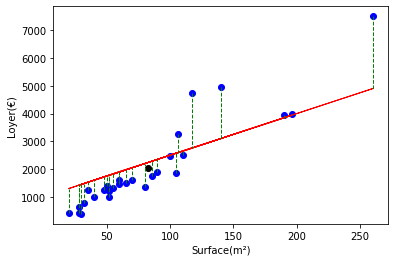

In [0]:
# Plot the Hypothesis: set parameters manually
b = 1000.0 
#b = -68.6
w = 15.0
#w = 26.5

# Plot the data
plt.scatter(X, y,  color='blue')
# Plot a red line corrensponding to our Hypothesis model.
y_pred = predict(w,b,X)
plt.plot(X, y_pred, color='red', linewidth=1)
# Plot costs
for k in range(m):
    plt.plot([X[k], X[k]],[y[k],y_pred[k]],'g--', linewidth=1 )
# Mean Point
plt.scatter(np.mean(X),np.mean(y), color='black')
# Put labels
plt.xlabel("Surface(m²)")
plt.ylabel("Loyer(€)")

plt.show()


In [0]:
def cost(y, y_pred):
    """
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
    """
    return np.sqrt(((y_pred - y) ** 2).mean())


In [0]:
loss = cost(y,y_pred)
print("L'erreur moyenne de l'hypothèse testée est :",loss, "€")


L'erreur moyenne de l'hypothèse testée est : 904.892949469715 €


### **2. Implémentation de la descente de gradient**
On veut observer l'effet d'une variation des paramètres sur le coût, en mathématiques, cela s'appelle calculer la dérivée de la fonction de coût ! (pas compliquée ici puisqu'on dérive un carré...)

![Formule de la descente de gradient](https://drive.google.com/uc?id=1TaSb_ce-rny-1asU3YNQFDA-6Q6uwKpB)

a (alpha) désigne le **"taux d'apprentissage"** (*Learning Ratio*), trop lent, on ne convergera pas assez vers la solution optimale, trop rapide, on oscillera autour...

Le gradient

In [0]:
def gradient(X, y, y_pred):
    """
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
        Our model's predictions
    """
    dw = ((y_pred - y) * X).mean()/cost(y,y_pred)
    db = (y_pred - y).mean()/cost(y,y_pred)
    return dw, db
 


L'optimisation par descente de gradient


In [0]:
def gradient_descent(X, y, w, b, epochs, learning_ratio):
    """
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float
        The bias unit for our linear model
    epochs : int
        The number of times our model iterates over the entire training set
    learning_rate : float
        The rate at which our model tends to adjust it's parameters
    """

    for i in range(epochs):
        # predict the value of y with our current model
        y_pred = predict(w, b, X)
        
        # compute the gradient with respect to w and b
        dw, db = gradient(X, y, y_pred)
        
        # adjust w and b as to minimize the cost function
        w = w - learning_ratio * dw
        b = b - learning_ratio * db

        # cost
        l = cost(y,y_pred)
        loss_history.append(l)
        w_history.append(w)
        b_history.append(b)
        absc.append(i)

    return w, b


Initialisation des paramètres

In [0]:
def initialize_parameters(n):
    """
    n : int
        The dimensions of the data
    """
    return np.zeros((1, n)), -60.0
 


Exécution

![regression par descente de gradient…](https://miro.medium.com/max/2000/1*XGaA7KWUlhWZLIezYEBIHA.gif)

w: [[26.00451204 26.00451204 26.00451204 26.00451204 26.00451204 26.00451204
  26.00451204 26.00451204 26.00451204 26.00451204 26.00451204 26.00451204
  26.00451204 26.00451204 26.00451204 26.00451204 26.00451204 26.00451204
  26.00451204 26.00451204 26.00451204 26.00451204 26.00451204 26.00451204
  26.00451204 26.00451204 26.00451204 26.00451204]]
b: -59.822684881798416
cost: 594.392338750875


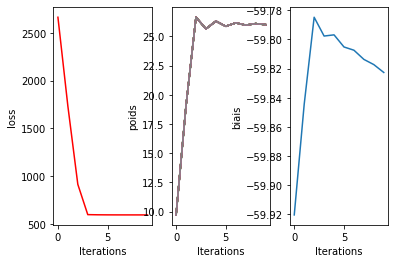

In [0]:
# initialize w and b
w, b = initialize_parameters(m)

#initialize histories
loss_history = []
w_history = []
b_history = []
absc = []
        
# run gradient descent in order to find optimal values for w and b
epochs=10
learning_ratio=0.1
w, b = gradient_descent(X, y, w, b, epochs, learning_ratio)

# graphics
plt.subplot(1,3,1)
plt.plot(range(epochs),loss_history,'r')
plt.xlabel("Iterations")
plt.ylabel("loss")

plt.subplot(1,3,2)
plt.plot(range(epochs), np.mean(w_history, axis = 1))
plt.xlabel("Iterations")
plt.ylabel("poids")

plt.subplot(1,3,3)
plt.plot(range(epochs), b_history)
plt.xlabel("Iterations")
plt.ylabel("biais")
        
# calculate the final cost function
c = cost(y, predict(w, b, X))
    
# print out the model details
print('w:', w)
print('b:', b)
print('cost:', c)


In [0]:
epochs

10

**Affichage de l'hypothèse finale**

[[ 668.30365227 1240.40291718 2696.65559149 5037.0616752  1370.42547739
  4881.03460296 2800.67363966 1500.44803759 1188.3938931   850.33523656
  2176.56535067 1630.4705978   772.32170044 1292.41194126  980.35779677
  6701.35044584 1760.49315801 2982.70522394 2280.58339883  720.31267636
  2670.65107945 1292.41194126 2020.53827842 1500.44803759 3580.80900089
   460.26755594 2540.62851924  668.30365227]]


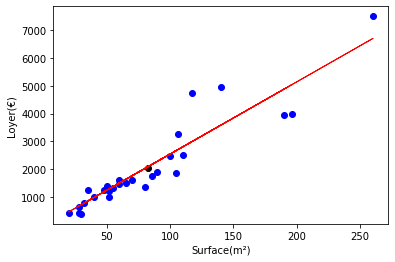

In [0]:

# Plot training set
plt.scatter(X, y ,  color='blue')

# Plot Hypothesis (theta were calculated with the Gradient Descent)

y_pred =w*X+b
print(y_pred)

plt.plot(X, y_pred.T, color='red', linewidth=1)
# Plot costs
#for k in range(m):
#   plt.plot([X[k], X[k]],[y[k],y_pred[k]],'g--', linewidth=1 )

# Mean Point
plt.scatter(np.mean(X),np.mean(y), color='black')

# Put labels
plt.xlabel("Surface(m²)")
plt.ylabel("Loyer(€)")

plt.show()


## **1.2. L' "Analyse en Composantes Principales" (ACP)**



### **1.2.a/ la classification des iris**

https://frama.link/OT_dimension2  


### **1.2.b/ Les décathloniens**

C'est en R, mais ça devrait calmer un peu ceux qui pensent que R, c'est pas bien... C'est super bien fait, et facile à comprendre : (et si quelqu'un sait faire la même chose en Python, je suis preneur...)

https://www.kaggle.com/capedcrusader/pca-on-a-random-dataset/notebook 


### **1.2.c/ Un usage d'une ACP simplifiée : la SVD pour la compression d'image**

https://frama.link/OT_dimension3







## **1.3. "Réseau de Neurones Convolutionnel" (CNN)**

https://frama.link/OT_dimension4 


# **2. Récupérer l'information perdue : "AutoEncoder"**

https://frama.link/OT_dimension5 